In [81]:
import pandas as pd
import seaborn as sns

In [82]:
BASE_DIR = str('/home/karnamshaym/Documents/work/AgriTech')

In [83]:
data = pd.read_csv(BASE_DIR +'/data/Fertilizer_Prediction.csv')
data.head()

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [84]:
len(data)

99

In [85]:
data.isna().sum()

Temperature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [86]:
data.duplicated().sum()

0

In [87]:
data['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [88]:
data['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [116]:
data['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [90]:
# sns.pairplot(data, hue='Fertilizer Name')

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [92]:
x = data.drop('Fertilizer Name', axis='columns')
x.head()

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,Sandy,Maize,37,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36
2,34,65,62,Black,Cotton,7,9,30
3,32,62,34,Red,Tobacco,22,0,20
4,28,54,46,Clayey,Paddy,35,0,0


In [93]:
y = data['Fertilizer Name']
y.head()

0        Urea
1         DAP
2    14-35-14
3       28-28
4        Urea
Name: Fertilizer Name, dtype: object

In [96]:
le = LabelEncoder()
x['Soil Type'] = le.fit_transform(x['Soil Type'])
x['Crop Type'] = le.fit_transform(x['Crop Type'])

In [97]:
x.head()

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,4,3,37,0,0
1,29,52,45,2,8,12,0,36
2,34,65,62,0,1,7,9,30
3,32,62,34,3,9,22,0,20
4,28,54,46,1,6,35,0,0


In [98]:
x.describe()

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,2.010101,5.151515,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,1.410565,3.140790,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,1.000000,2.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,2.000000,5.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,3.000000,8.000000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,4.000000,10.000000,42.000000,19.000000,42.000000


In [99]:
x['Crop Type'] = x['Crop Type'].astype('category')
x['Soil Type'] = x['Soil Type'].astype('category')

In [100]:
x.describe(include='all')

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.0,99.0,99.000000,99.000000,99.000000
unique,NaN,NaN,NaN,5.0,11.0,NaN,NaN,NaN
top,NaN,NaN,NaN,2.0,8.0,NaN,NaN,NaN
freq,NaN,NaN,NaN,21.0,13.0,NaN,NaN,NaN
mean,30.282828,59.151515,43.181818,NaN,NaN,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,NaN,NaN,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,NaN,NaN,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,NaN,NaN,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,NaN,NaN,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,NaN,NaN,24.000000,7.500000,30.000000


In [101]:
model = RandomForestClassifier()

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [103]:
x_train.shape

(89, 8)

In [104]:
y_train.shape

(89,)

In [105]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [106]:
y_pred = model.predict(x_test)

In [107]:
model.score(x_test, y_test)

0.9

In [108]:
precision_score(y_test, y_pred, average='weighted')

/home/karnamshaym/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9

In [109]:
recall_score(y_test, y_pred, average='weighted')

/home/karnamshaym/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9

In [110]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

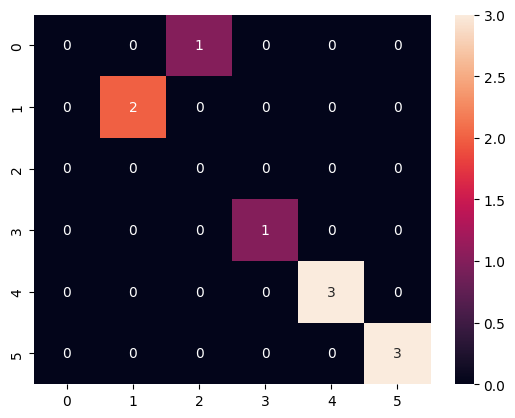

In [111]:
sns.heatmap(cm, annot=True)

In [112]:
import pickle as pkl

In [113]:
with open(BASE_DIR + '/models/fertilizer.pkl', 'wb') as f:
    pkl.dump(model, f)

In [118]:
x_test[0:1]

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
63,28,54,47,4,0,5,18,15


In [120]:
t = [28,54,47,4,0,5,18,15]
model.predict([t])

/home/karnamshaym/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['17-17-17'], dtype=object)

In [117]:
model.predict(x_test[0:1])

array(['17-17-17'], dtype=object)